In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
!gdown --id 18Q9RcxLFsVGyrSpBYR1t5NzEimhu9jFt

Downloading...
From: https://drive.google.com/uc?id=18Q9RcxLFsVGyrSpBYR1t5NzEimhu9jFt
To: /content/big_mart_sales_prediction.csv
100% 870k/870k [00:00<00:00, 58.3MB/s]


In [3]:
df = pd.read_csv('big_mart_sales_prediction.csv')

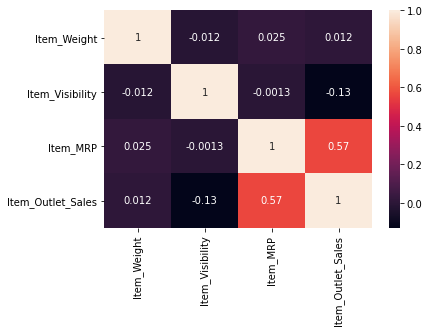

In [27]:
sns.heatmap(df.corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


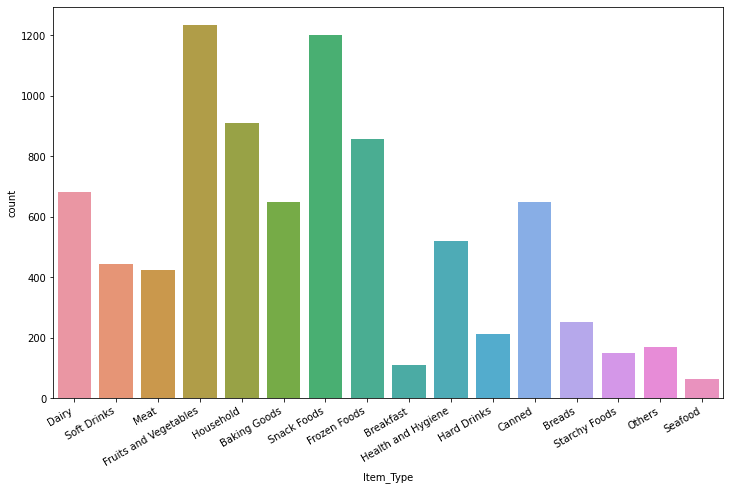

In [28]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(df['Item_Type'])
fig.autofmt_xdate()

In [29]:
df.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

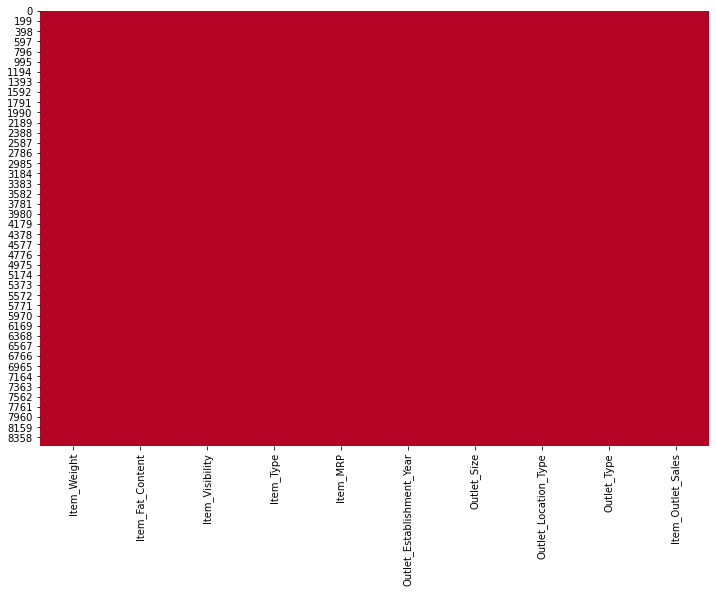

In [30]:
fig = plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm_r')

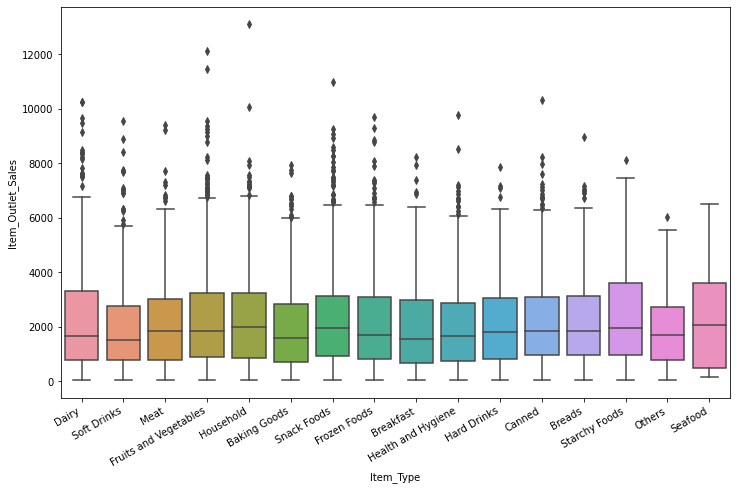

In [33]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
fig.autofmt_xdate()

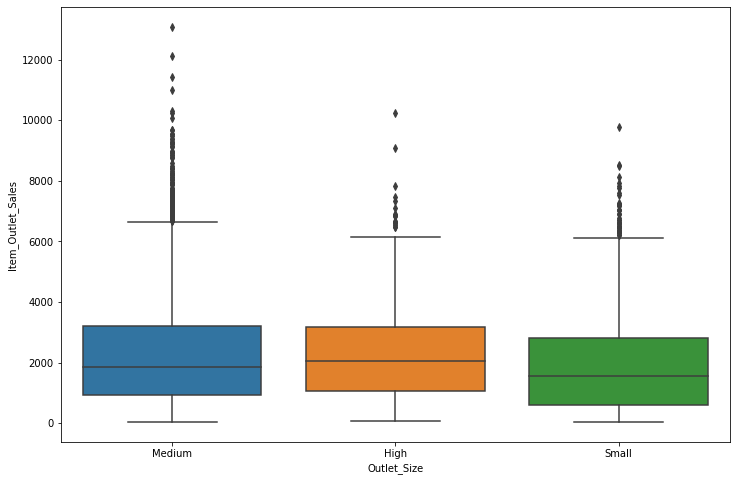

In [34]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)

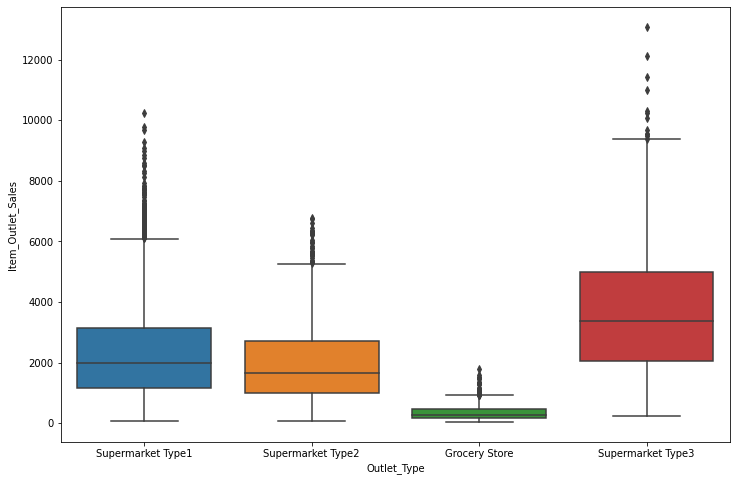

In [35]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)

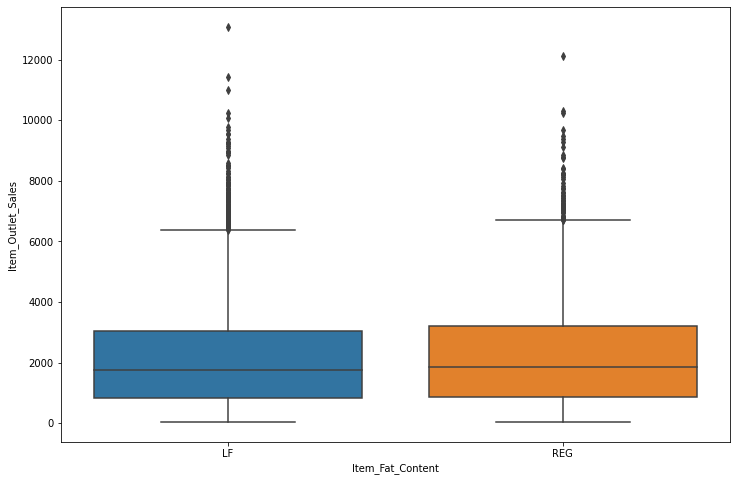

In [36]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)

In [37]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [38]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [39]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [40]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [32]:
df['Item_Fat_Content'].value_counts()

LF     5517
REG    3006
Name: Item_Fat_Content, dtype: int64

In [41]:
import plotly.express as px

fig = px.pie(df, values='Item_Outlet_Sales', names='Item_Type', title='Item Outlet Sales Share per Item Type')
fig.show()

In [4]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'Regular', 'reg', 'low fat'], ['LF', 'REG', 'REG', 'LF'])

In [5]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [6]:
average = df['Item_Weight'].mean()

In [7]:
df['Item_Weight'].fillna(value=average, inplace=True)

In [8]:
df['Outlet_Size'].fillna(value='Medium', inplace=True)

In [9]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [10]:
df_real = pd.get_dummies(df, drop_first=True)
df_real

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_REG,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0


In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y =StandardScaler()

In [12]:
X = df_real.drop(['Item_Outlet_Sales'], axis=1)
y = np.array(df_real['Item_Outlet_Sales']).reshape(-1, 1)

In [13]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(lm.intercept_)
print(lm.coef_)

[0.00160504]
[[-4.49663740e-03 -1.40502649e-02  5.71477227e-01  1.25561197e-02
  -2.74564265e-03  4.63093924e-03  3.88628707e-03 -1.42438824e-02
  -1.96456975e-03  9.21483061e-03  6.14241852e-04  1.91452099e-03
  -2.60566814e-03 -7.11145891e-05 -3.70265681e-03  1.16087060e-02
  -2.05278702e-03 -3.74701951e-03  1.72563606e-03 -1.54851217e+10
   3.57612531e+10 -1.75684897e+10  6.41689003e+10  6.63315786e+10
   3.79552525e+10  6.62374701e+10 -1.28814165e+10 -4.54061931e+10
  -8.98375065e+08 -3.30051116e+09  7.92803087e+10 -5.45483034e+10
  -9.29805281e+09 -2.22527014e+10]]


In [19]:
predicted = sc_y.inverse_transform(lm.predict(X_test))

In [20]:
y_real = sc_y.inverse_transform(y_test)
y_real

array([[1743.0644],
       [ 356.8688],
       [ 377.5086],
       ...,
       [ 629.181 ],
       [ 253.004 ],
       [ 976.7286]])

In [21]:
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_real, predicted))
print('MSE: ', metrics.mean_squared_error(y_real, predicted))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_real, predicted)))
print('R2 score: ', metrics.r2_score(y_real, predicted))

MAE:  792.0701532229516
MSE:  1143548.4848816786
RMSE:  1069.3682643886898
R2 score:  0.579263767865867


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


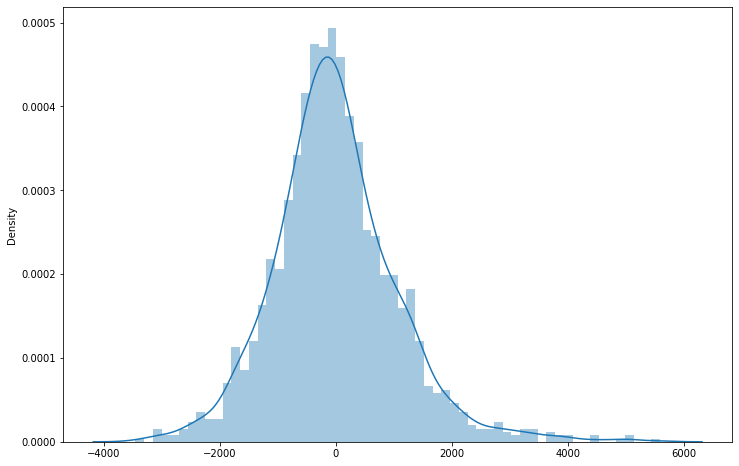

In [22]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12, 8))
sns.distplot((y_real-predicted), bins=60)

In [23]:
dict_compare = {'Sales': y_real.flatten(), 'Predicted': predicted.flatten()}
df_predicted = pd.DataFrame(dict_compare)
df_predicted

,Sales,Predicted
0,1743.0644,1361.506787
1,356.8688,707.797287
2,377.5086,877.910627
3,5778.4782,4230.204780
4,2356.9320,3348.057738
...,...,...
1700,3004.0896,2034.074011
1701,890.8404,2167.637084
1702,629.1810,849.790030
1703,253.0040,567.568591


In [24]:
print(df_predicted.to_string())

           Sales    Predicted
0      1743.0644  1361.506787
1       356.8688   707.797287
2       377.5086   877.910627
3      5778.4782  4230.204780
4      2356.9320  3348.057738
5       865.5400   638.494987
6      4613.9940  4754.107129
7      2410.8618  2048.651807
8      1948.1308  1393.845474
9      1937.4780  2786.947673
10      210.3928  -240.768392
11      255.0014  2119.434996
12     4541.4218  3900.302005
13      657.8104   964.524670
14      578.5802   753.760143
15     4229.1616  4347.790537
16     1267.0174  1789.017978
17     2388.8904  1827.846534
18     1797.6600  1969.172064
19     4447.5440  3241.218997
20     2570.6538  3093.605390
21     1779.6834  2708.978110
22     4211.1850  2852.158817
23     3912.2408  2505.468306
24     2366.9190  4198.562599
25     1298.3100  2265.837855
26      149.8050   708.666292
27     3916.2356  3789.407909
28     2065.3116  3151.617140
29     3029.3900  3882.856819
30      788.3072   816.256869
31     2566.6590  2751.077638
32      57

In [25]:
df_predicted.corr()

,Sales,Predicted
Sales,1.000000,0.761382
Predicted,0.761382,1.000000
